<a href="https://colab.research.google.com/github/Seyjuti8884/EDA/blob/main/Bike_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. BIKE DATASET

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("BIKE DETAILS.csv")

In [7]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [9]:
df.shape

(1061, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [12]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [13]:
df.duplicated().sum()

6

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.fillna("0", inplace = True)

<ipython-input-15-e339e8fa1c8f>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("0", inplace = True)


In [16]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


1. Range of Selling Prices

In [18]:
selling_price_range = (df['selling_price'].min(), df['selling_price'].max())
print("Range of Selling Prices:", selling_price_range)


Range of Selling Prices: (5000, 760000)


2. Median Selling Price

In [19]:
selling_price_median = df['selling_price'].median()
print("Median Selling Price:", selling_price_median)


Median Selling Price: 45000.0


3. Most Common Seller Type

In [20]:
most_common_seller_type = df['seller_type'].mode()[0]
print("Most Common Seller Type:", most_common_seller_type)


Most Common Seller Type: Individual


4. Bikes Driven More Than 50,000 Kilometers

In [21]:
bikes_above_50000_km = df[df['km_driven'] > 50000].shape[0]
print("Number of Bikes Driven More Than 50,000 km:", bikes_above_50000_km)


Number of Bikes Driven More Than 50,000 km: 168


5. Average km_driven for Each Ownership Type

In [22]:
average_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by Ownership Type:")
print(average_km_by_owner)


Average km_driven by Ownership Type:
owner
1st owner     32732.710240
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6. Proportion of Bikes from the Year 2015 or Older

In [23]:
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
proportion_2015_or_older = bikes_2015_or_older / df.shape[0]
print("Proportion of Bikes from 2015 or Older:", proportion_2015_or_older)


Proportion of Bikes from 2015 or Older: 0.5658767772511848


7. Trend of Missing Values

In [24]:
missing_values = df.isnull().sum()
print("Missing Values in Dataset:")
print(missing_values)


Missing Values in Dataset:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


8. Highest ex_showroom_price and Corresponding Bike

In [26]:

df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')


highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_price = df[df['ex_showroom_price'] == highest_ex_showroom_price]['name']

print("Highest Ex-Showroom Price:", highest_ex_showroom_price)
print("Bike with Highest Ex-Showroom Price:", bike_with_highest_price.values)


Highest Ex-Showroom Price: 1278000.0
Bike with Highest Ex-Showroom Price: ['Harley-Davidson Street Bob']


9. Total Bikes Listed by Each Seller Type

In [27]:
bikes_by_seller = df['seller_type'].value_counts()
print("Total Bikes Listed by Each Seller Type:")
print(bikes_by_seller)


Total Bikes Listed by Each Seller Type:
seller_type
Individual    1049
Dealer           6
Name: count, dtype: int64


10. Relationship Between selling_price and km_driven for First-Owner Bikes

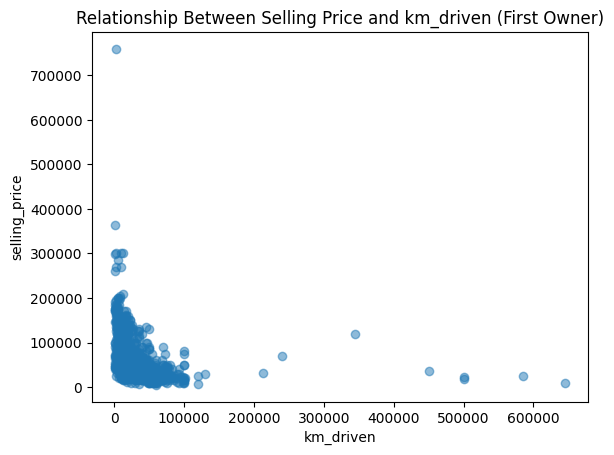

In [28]:
first_owner_bikes = df[df['owner'] == '1st owner']
plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'], alpha=0.5)
plt.title("Relationship Between Selling Price and km_driven (First Owner)")
plt.xlabel("km_driven")
plt.ylabel("selling_price")
plt.show()


11. Removing Outliers in km_driven Using IQR Method

In [29]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("Dataset after Removing Outliers:", df_filtered.shape[0])


Dataset after Removing Outliers: 1017


12. Bivariate Analysis Between Year and Selling Price

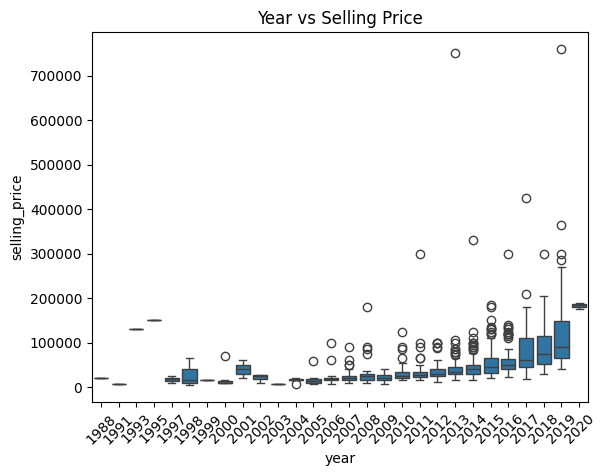

In [30]:
sns.boxplot(x='year', y='selling_price', data=df)
plt.title("Year vs Selling Price")
plt.xticks(rotation=45)
plt.show()


13. Average Depreciation in Selling Price Based on Bike Age
python



In [31]:
current_year = 2025  # Adjust to the current year
df['age'] = current_year - df['year']
average_depreciation = df.groupby('age')['selling_price'].mean()
print("Average Depreciation by Age of Bike:")
print(average_depreciation)


Average Depreciation by Age of Bike:
age
5     183333.333333
6     119689.511628
7      87603.915385
8      78962.121212
9      58469.018692
10     56500.000000
11     48668.131868
12     51152.777778
13     35976.637681
14     35655.721311
15     31993.220339
16     22240.740741
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


14. Bikes Priced Above Average for Their Manufacturing Year

In [32]:
avg_price_by_year = df.groupby('year')['selling_price'].mean()
above_avg_bikes = df[df.apply(lambda x: x['selling_price'] > avg_price_by_year[x['year']], axis=1)]
print("Bikes Priced Above Average for Their Year:")
print(above_avg_bikes[['name', 'year', 'selling_price']])


Bikes Priced Above Average for Their Year:
                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[332 rows x 3 columns]


15. Correlation Matrix for Numeric Columns

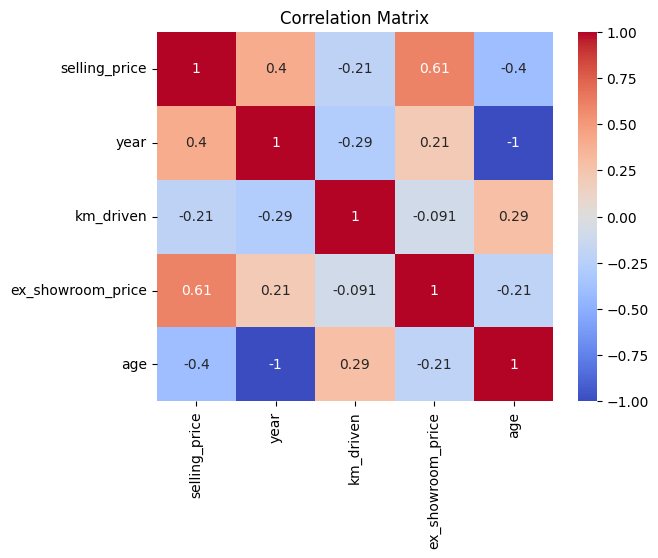

In [33]:
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
